In [ ]:
# __tablename__ : 데이터베이스의 테이블 이름

Base = declarative_base()

class Codis(Base):
    __tablename__ = 'codis'

    id = Column(Integer, primary_key=True)
    rank = Column(Integer)
    id_codi = Column(Integer)
    img = Column(String)
    link = Column(String)
    tag = Column(String)
    
    def __init__(self, id, rank, id_codi, img, link, tag):
        self.id = id
        self.rank = rank
        self.id_codi = id_codi
        self.img = img
        self.link = link
        self.tag = tag
    
    def __repr__(self):
        return "<Codi {}, {}, {}, {}, {}>".format(self.id, self.rank, self.id_codi, self.img, self.link, self.tag)
    
    
class Colors(Base):
    __tablename__ = 'colors'

    id = Column(Integer, primary_key=True) 
    color = Column(String) 
    
    def __init__(self, id, color):
        self.id = id
        self.color = color 
    
    def __repr__(self):
        return "<Color {}, {}>".format(self.id, self.color)
    

class Tags(Base):
    __tablename__ = 'tags'
    
    id = Column(Integer, primary_key=True)
    tag = Column(String)
    
    def __init__(self, id, tag):
        self.id = id
        self.tag = tag
    
    def __repr__(self):
        return "<Tag {}, {}>".format(self.id, self.tag)
    
    
class Items(Base):
    __tablename__ = 'items'

    id = Column(Integer, primary_key=True) 
    id_item = Column(Integer) 
    id_codi = Column(Integer)
    name = Column(String)
    brand = Column(String)
    price = Column(Integer)
    img = Column(String)
    
    def __init__(self, id, id_item, id_codi, name, brand, price, img):
        self.id = id
        self.id_item = id_item
        self.id_codi = id_codi
        self.name = name
        self.brand = brand
        self.price = price
        self.img = img
    
    def __repr__(self):
        return "<item {}, {}, {}, {}, {}, {}, {}>".format(self.id, self.id_item, self.id_codi, self.name, self.brand, self.price, self.img)
    
    
    
class MapColor(Base):
    __tablename__ = 'mapping_codi_color'
    
    id = Column(Integer, primary_key=True)
    id_codi = Column(Integer)
    ratio = Column(REAL)
    id_color = Column(Integer)
    
    def __init__(id, id_coid, ratio, id_color):
        self.id = id
        self.id_codi = id_coid
        self.ratio = ratio
        self.id_color = id_color
        
    def __repr__(self):
        return "<mapColor {}, {}, {}, {}>".format(self.id, self.id_codi, self.ratio, self.id_color)
    
    
class MapTag(Base):
    __tablename__ = 'mapping_codi_tag'
    
    id = Column(Integer, primary_key=True)
    id_codi = Column(Integer) 
    id_tag = Column(Integer)
    
    def __init__(id, id_coid, id_tag):
        self.id = id
        self.id_codi = id_coid 
        self.id_tag = id_tag
        
    def __repr__(self):
        return "<maptag {}, {}, {}>".format(self.id, self.id_codi, self.id_tag)
    
    
class MapItem(Base):
    __tablename__ = 'mapping_codi_item'
    
    id = Column(Integer, primary_key=True)
    id_codi = Column(Integer) 
    id_item = Column(Integer)
    
    def __init__(id, id_coid, id_item):
        self.id = id
        self.id_codi = id_coid 
        self.id_item = id_item
        
    def __repr__(self):
        return "<mapitem {}, {}, {}>".format(self.id, self.id_codi, self.id_item)
    
    
class ViewCodiColor(Base):
    __tablename__ = 'view_codi_color'
     
    id_codi = Column(Integer, primary_key=True)
    ratio = Column(REAL)
    color = Column(String)
    
    def __init__(id_codi, ratio, color):
        self.id_codi = id_codi
        self.ratio = ratio
        self.color = color
    
    def __repr__(self):
        return "<viewcolor {}, {}, {}>".format(self.id_codi, self.ratio, self.color)
    

In [ ]:
from sqlalchemy.ext.declarative import DeclarativeMeta
class AlchemyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj.__class__, DeclarativeMeta):
            # an SQLAlchemy class
            fields = {}
            for field in [x for x in dir(obj) if not x.startswith('_') and x != 'metadata']:
                data = obj.__getattribute__(field)
                try:
                    json.dumps(data) # this will fail on non-encodable values, like other classes
                    fields[field] = data
                except TypeError:
                    fields[field] = None
            # a json-encodable dict
            return fields

        return json.JSONEncoder.default(self, obj)

In [21]:
with open('pw.pw', 'rb') as f:
    pw = pickle.load(f)

ip = '127.0.0.1'
db = 'codi'

In [22]:
engine = sqlalchemy.create_engine("mysql+mysqldb://root:"+pw+"@"+ip+"/"+db)

In [ ]:
# make session
Session = sessionmaker(bind=engine)
session = Session()

In [ ]:
results = session.query(Colors).all()
results[:5]

In [ ]:
session.query(ViewCodiColor).filter(ViewCodiColor.id_codi == 395660).all()

In [14]:
session.query(MapColor) \
.join(Colors, MapColor.id_color == Colors.id) \
.join(Codis, MapColor.id_codi == Codis.id_codi)\
.filter(Colors.color.like("#3076bb")).all()

[<mapColor 1271, 395488, 0.368486514794449, 1677>]

In [260]:
session.query(Codis) \
.join(MapColor, MapColor.id_codi == Codis.id_codi) \
.join(Colors, MapColor.id_color == Colors.id) \
.filter(Colors.color.like("#3076bb")).all()

[<Codi 1462, 1364, 395488, http://img.mapssi.com/codi/yjh6782@naver_com1521506804476.jpg, http://www.mapssi.com/mapssi_web/codi_detail.php?codiNo=395488>]

In [326]:
session.query(Colors) \
.join(MapColor, MapColor.id_color == Colors.id) \
.join(Codis, MapColor.id_codi == Codis.id_codi) \
.filter(Codis.id_codi == (395660)).all()

[<Color 388, #e9e9e7>, <Color 2791, #99a1b4>, <Color 500, #1f1f20>]

In [59]:
datas = json.loads(json.dumps(results, cls=AlchemyEncoder))

In [15]:
db = MySQLdb.connect(
"127.0.0.1",
"root",
pw,
"codi",
charset='utf8',
) 

In [383]:
def get_codi_tag(id_codi):
    SQL_QUERY = """
        SELECT *
        FROM view_codi_tag
        where id_codi = {};
    """.format(id_codi)
      
    curs = db.cursor()
    count = curs.execute(SQL_QUERY)
    rows = curs.fetchall()
    return rows

def get_codi_color(id_codi):
      
    SQL_QUERY = """
        SELECT *
        FROM view_codi_color
        where id_codi = {};
    """.format(id_codi)
      
    curs = db.cursor()
    count = curs.execute(SQL_QUERY)
    rows = curs.fetchall()
    return rows

def get_codi_colors(colors):
      
    SQL_QUERY = """
        select codis.id_codi, colors.color
        from mapping_codi_color
        join codis on codis.id_codi = mapping_codi_color.id_codi
        join colors on colors.id = mapping_codi_color.id_color
        where colors.color in {}
    """.format(colors)
      
    print(SQL_QUERY)
    curs = db.cursor()
    count = curs.execute(SQL_QUERY)
    rows = curs.fetchall()
    return rows

In [396]:
set(get_codi_color(395660))

{(395660, 0.0372809692238891, '#1f1f20'),
 (395660, 0.202199455218116, '#99a1b4'),
 (395660, 0.760519575557995, '#e9e9e7')}

In [397]:
set(get_codi_tag(395660))

{(395660, '남친룩'), (395660, '코디'), (395660, '평범하게')}

In [47]:
clist = ('#3076bb', '#3076bb')
set(get_codi_colors(str(clist)))


        select codis.id_codi, colors.color
        from mapping_codi_color
        join codis on codis.id_codi = mapping_codi_color.id_codi
        join colors on colors.id = mapping_codi_color.id_color
        where colors.color in ('#3076bb', '#3076bb')
    


{(395488, '#3076bb')}

In [329]:
def get_similar_color(hexcode):
    cinput = hex2rgb(hexcode)
    
    view_color(cinput)
    
    rgb_ls = []
    hex_ls = []
    for color in results:
        rgb_ls.append( np.array(hex2rgb(color.color)))
        hex_ls.append(color.color)
     
    rgb_ls = np.vstack(rgb_ls)
    
    cinput = np.repeat(np.array(cinput).reshape(1, 3), len(rgb_ls), axis=0)
    uc = np.sqrt(np.sum((rgb_ls - cinput)**2, axis=1)) 
    datacom = pd.DataFrame([uc, hex_ls]).T

 
    datacom = datacom.sort_values(0) 
    #datacom = datacom[datacom[0] < 50]
     
    sdata = datacom[:5][1].values 
 
     
        
    res = session.query(Codis) \
    .join(MapColor, MapColor.id_codi == Codis.id_codi) \
    .join(Colors, MapColor.id_color == Colors.id) \
    .filter(Colors.color.in_(sdata)).all()
        
    #find_codi_ls.extend(res)
    
    rgb_ls=[]
    for codi in res:
        
        rgbs = session.query(Colors) \
        .join(MapColor, MapColor.id_color == Colors.id) \
        .join(Codis, MapColor.id_codi == Codis.id_codi) \
        .filter(Codis.id_codi == (codi.id_codi)).all()
        
        rgb_ls.append(rgbs)
    return res, rgb_ls
    # 컬러에 해당하는 코디 찾기

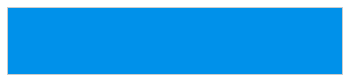

In [330]:
codis, rgb_ls = get_similar_color('#0091ea')

In [332]:
rgb_ls

[[<Color 1779, #4b80b6>, <Color 514, #1d1e21>, <Color 226, #e7eaed>],
 [<Color 2803, #0458b5>, <Color 2607, #e9e9ed>, <Color 1220, #46453b>],
 [<Color 2803, #0458b5>, <Color 2607, #e9e9ed>, <Color 1220, #46453b>],
 [<Color 2649, #18191b>, <Color 1677, #3076bb>, <Color 2392, #edeff0>],
 [<Color 777, #fbfbfb>, <Color 1911, #3875b0>, <Color 992, #cdd3e1>],
 [<Color 2467, #181826>, <Color 1651, #bdc9ce>, <Color 1424, #1e48b7>]]